In [1]:
import pandas as pd

In [2]:
url = "supermarket_sales - Sheet1.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.shape

(1000, 17)

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [9]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [27]:
df["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [10]:
round(df.describe(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [11]:
df.describe(include = "object")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [12]:
df["Date"] = pd.to_datetime(df["Date"], format = 'mixed')

In [13]:
df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [14]:
df.Time.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Time
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [15]:
df_branches = df.groupby(["Branch", "City"]).agg("count")

In [16]:
df_branches

,,Invoice ID,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Branch,City,,,,,,,,,,,,,,,
A,Yangon,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340
B,Mandalay,332,332,332,332,332,332,332,332,332,332,332,332,332,332,332
C,Naypyitaw,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328


In [17]:
pivot_rating = df.pivot_table(index = "Branch", columns = "Product line", values = ["Rating"], aggfunc= "mean", margins = True, margins_name = "Total")

In [18]:
pivot_rating.round(1)

Rating                                         \
Product line Electronic accessories Fashion accessories Food and beverages   
Branch                                                                       
A                               6.9                 6.9                7.3   
B                               7.1                 6.7                7.0   
C                               6.7                 7.4                7.1   
Total                           6.9                 7.0                7.1   

                                                                           
Product line Health and beauty Home and lifestyle Sports and travel Total  
Branch                                                                     
A                          6.9                6.9               7.3   7.0  
B                          7.1                6.5               6.5   6.8  
C                          7.0                7.1               7.0   7.1  
Total                      7.0                6.8               6.9   7.0

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

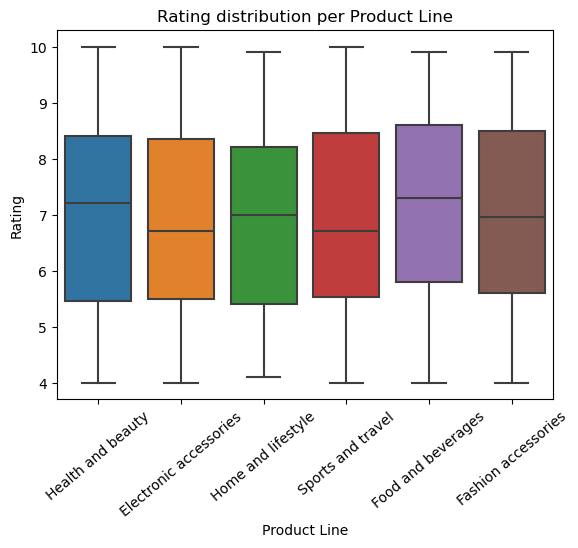

In [23]:
sns.boxplot(x="Product line", y='Rating', data=df)

plt.title('Rating distribution per Product Line') 
plt.xlabel('Product Line')
plt.ylabel('Rating')  
plt.xticks(rotation=40)  

plt.show()


Pivot Table:
Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Time                                                                            
10:00                         0.0000             903.5670              76.356   
10:01                         0.0000               0.0000               0.000   
10:02                       451.3635               0.0000              22.659   
10:03                         0.0000               0.0000               0.000   
10:04                         0.0000               0.0000               0.000   
...                              ...                  ...                 ...   
20:52                         0.0000             352.5795               0.000   
20:54                       203.1120             172.4940               0.000   
20:55                         0.0000               0.0000             783.300   
20:57                       148.9950               0.0000               0.000   
20:59         

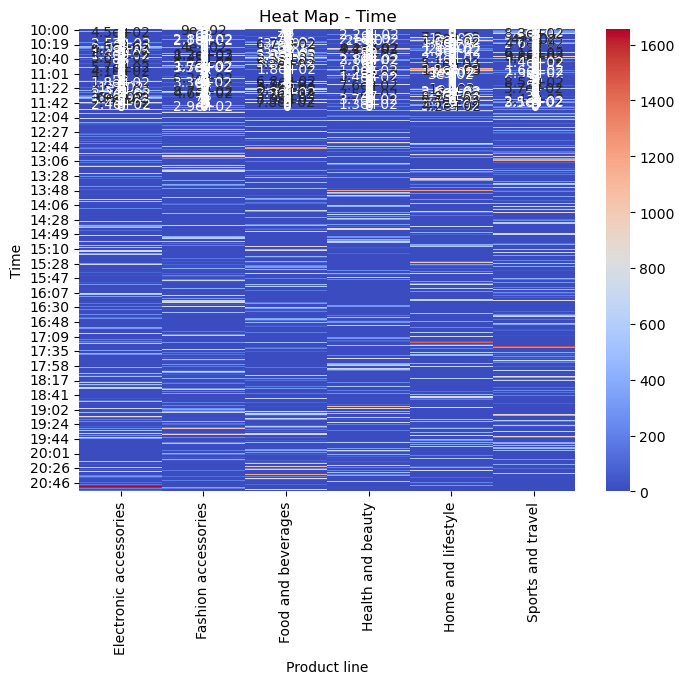

In [24]:
grouped = df.groupby(['Time', 'Product line'])['Total'].sum().reset_index()

pivot_table = grouped.pivot(index='Time', columns='Product line', values='Total').fillna(0)

print("\nPivot Table:")
print(pivot_table)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heat Map - Time')
plt.show()